# Assignment 1. 
### Text similarity and Agglomerative Document Clustering. 

In [1]:
# Import libraries 
import pandas as pd 
import re
import math
from scipy.spatial.distance import cosine  


## Task 1

Task 1.
Please download text file. There we have 22 sentence related to the «cat» topic.
- Cat (animal)
- UNIX-utility cat for to display the contents of files
- versions of the OS X operating system named after the feline family
Your task is to find two sentences that are closest in meaning to the first sentence in document
(«In comparison to dogs, cats have not undergone …….») We will use the cosine distance as a
measure of proximity.
Steps:
1. Open the file.
2. Each line is the one sentence. Please make them all in lower case form using string function
lower(). EXAMPLE: <i>in comparison to dogs, cats have not undergone major changes during the</i>
domestication process.
3. Tokenization. Means that splitting the sentences to the words. For that purpose you can use
regular expressions, that can split the words by space or any other symbols that aren’t letters.
re.split('[^a-z]', t). Do not forgot to remove empty words. EXAMPLE: <i>['in', 'comparison', 'to',
'dogs', '', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication',
'process']</i>
4. Make a list of all the words that appear in the sentences. Note: all the words are unique. And
give the index to the each sentence index from 0 to #of_the_unique_words. You can use dict.
Example: <i>{0: ‘mac', 1: 'permanently',2: 'osx',3: 'download',4: 'between',5: ‘based', 6: ‘which',
…………., 252: ‘safer', 253: ‘will’}.</i> Hint: we have 254 unique words.
5. And create Matrix with N x D dimensions. N is the number of the sentences and D is the
number of the unique words (22 x 254). Fill it in: the element with index (i, j) in this matrix must
be equal to the number of occurrences of the j-th word in the i-th sentence. (bag of words)
6. Find the cosine distance from first sentence to the all other sentences. Which two sentences
is close to the first sentence. You can use scipy.spatial.distance.cosine  

In [2]:
# 1. Read texts from file
with open('words.txt') as f:
    txt = f.readlines()

In [3]:
# 2
lines=[re.split('[^a-z]',i.lower()) for i in txt]

In [4]:
lines = [' '.join([j for j in i if j!='']) for i in lines ]

In [5]:
# 3. Tokenization.
words = ' '.join(lines).split(' ')

In [6]:
# 4. Make a list of all the words
words = list(set(words))

In [7]:
words_dic = {words.index(x): x for x in words}

In [8]:
# 5 create Matrix with N x D dimensions
df = pd.DataFrame(0,index=lines, columns=words_dic.values())

In [9]:
for i in df.index:
    for j in df.columns:
        for k in i.split(' '):
            if j==k:
                df.loc[i,j]+=1

In [10]:
df.head(3)

,three,lines,small,where,permanently,are,clear,editions,terms,longer,...,recent,just,lion,online,often,intel,release,count,closest,were
in comparison to dogs cats have not undergone major changes during the domestication process,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
as cat simply catenates streams of bytes it can be also used to concatenate binary files where it will just concatenate sequence of bytes,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
a common interactive use of cat for a single file is to output the content of a file to standard output,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 6. Find the cosine distance
cos = []
for i in range (0, df.shape[0]):
    cos.append(cosine(df.iloc[0], df.iloc[i]))
print("-- The cosine distance from first sentence to the all other sentences:\n ")
print(cos,'\n\n')

print("-- The two sentences which is close to the first sentence:\n")

for i in range (0, len(cos)):  
    if cos[i] in sorted(cos)[1:3]:
        print('*',str(i)+'’ sentence ( distance is:',cos[i],'):\n',txt[i])

-- The cosine distance from first sentence to the all other sentences:
 
[0.0, 0.9527544408738466, 0.8644738145642124, 0.8951715163278082, 0.7770887149698589, 0.9402385695332803, 0.7327387580875756, 0.9258750683338899, 0.8842724875284311, 0.9055088817476932, 0.8328165362273942, 0.8804771390665607, 0.8396432548525454, 0.8703592552895671, 0.8740118423302576, 0.9442721787424647, 0.8406361854220809, 0.956644501523794, 0.9442721787424647, 0.8885443574849294, 0.8427572744917122, 0.8250364469440588] 


-- The two sentences which is close to the first sentence:

* 4’ sentence ( distance is: 0.7770887149698589 ):
 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

* 6’ sentence ( distance is: 0.7327387580875756 ):
 Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).



## Task 2

For the second Task please do the same step from Task 1 (steps 1- 4).

In this task you will create Term Frequency — Inverse Document Frequency matrix. Find the cosine distance from first sentence to the all other sentences. Which two sentences is close to the
first sentence. You can use <i>scipy.spatial.distance.cosine.</i> Is the any difference from the result of the previous Task? Note: You should not to use any existing libraries for tdf/idf. All the steps similar
to the previous example. 

In [12]:
# Create Matrix with N x D dimensions
tf = pd.DataFrame(0,lines, words_dic.values())

In [13]:
# Term Frequency
for i in tf.index:
    for j in tf.columns:
        for k in i.split(' '):
            if j==k:
                tf.loc[i,j]+=1
        tf.loc[i,j] /= len(i.split(' '))

In [14]:
tf.head(3)

,three,lines,small,where,permanently,are,clear,editions,terms,longer,...,recent,just,lion,online,often,intel,release,count,closest,were
in comparison to dogs cats have not undergone major changes during the domestication process,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as cat simply catenates streams of bytes it can be also used to concatenate binary files where it will just concatenate sequence of bytes,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a common interactive use of cat for a single file is to output the content of a file to standard output,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Inverse Document Frequenc
idf=(len(tf.index) / tf[tf>0].count()).apply(lambda x : math.log(x))

In [16]:
# TF-IDF
tf_idf = idf*tf

In [17]:
tf_idf.head(3)

,three,lines,small,where,permanently,are,clear,editions,terms,longer,...,recent,just,lion,online,often,intel,release,count,closest,were
in comparison to dogs cats have not undergone major changes during the domestication process,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as cat simply catenates streams of bytes it can be also used to concatenate binary files where it will just concatenate sequence of bytes,0.0,0.0,0.0,0.099912,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.083018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a common interactive use of cat for a single file is to output the content of a file to standard output,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
cos2 = []
for i in range (0, tf_idf.shape[0]):
    cos2.append(cosine(tf_idf.iloc[0], tf_idf.iloc[i]))

print("-- The cosine distance from first sentence to the all other sentences:\n ")
print(cos2,'\n\n')

print("-- The two sentences which is close to the first sentence:\n")

for i in range (0, len(cos2)):  
    if cos2[i] in sorted(cos2)[1:3]:
        print('*',str(i)+'’ sentence ( distance is:',cos2[i],'):\n',txt[i])

-- The cosine distance from first sentence to the all other sentences:
 
[0.0, 0.9971134294446082, 0.9905440773848752, 0.9711649922394295, 0.8975348627550794, 0.9985750941939125, 0.9590381679218578, 0.997991811627765, 0.9953627002843829, 0.9904710663601372, 0.9899641915122135, 0.9944543294667505, 0.9911314553003079, 0.9907487583382132, 0.9325933597976847, 0.9420952068158919, 0.9885777915709388, 0.9968505062244742, 0.9984822394728942, 0.9970860881976974, 0.9900281057083465, 0.929176655050603] 


-- The two sentences which is close to the first sentence:

* 4’ sentence ( distance is: 0.8975348627550794 ):
 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

* 21’ sentence ( distance is: 0.929176655050603 ):
 The fifth major update to Mac OS X, Leopard, contains such a mountain of features - more than 300 by Apple's count.



## Task 3

Please run the Hierarchy Clustering algorithm for the Task 1 and Task 2. And plot the dendrogram.

Please explain your results. NOTE: by default scipy.cluster.hierarchy it uses euclidean distance.
You should change it to the cosine distance. 

In [19]:
import scipy.cluster.hierarchy as model

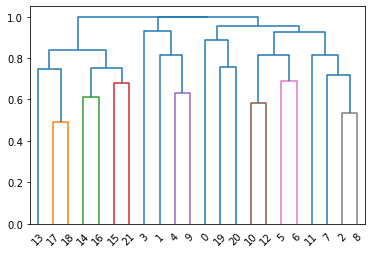

In [20]:
model.dendrogram(model.linkage(df, method='complete', metric='cosine'));

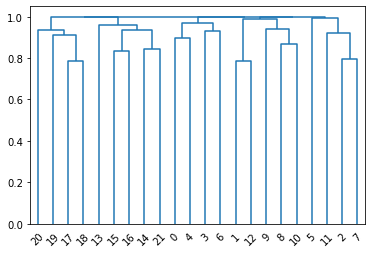

In [21]:
model.dendrogram(model.linkage(tf_idf, method='complete', metric='cosine'));

The dendrogram of the 1st task clusters all the text into 3 clusters, but the second by 5.

In the second dendrogram, sentences with index 0,4,3,6 at the top level are clustered together. These sentences all contain the words cats. Therefore, I think working with TF-IDF gives better results. But TF-IDF is based on the bag-of-words model, therefore it does not capture the position in the text, semantics, co-occurrences in different documents.  For this reason, I think, TF-IDF is only useful as a lexical level feature.